### Basic EDA on stream numbers
### Questions to answer:
1) Does featuring another artist on a track correlate to higher stream numbers?  
<br/><b>Yes, featuring an artist on a track will lead to higher stream numbers.</b>

2) What kind of growth in stream numbers has Spotify achieved over the past two years?

3) When do Spotify users tend to stream the most (day of week, time of year, etc.)?

4) What types of genres tend to be on the top 200 charts?

5) Who is the most popular artist in the last 2 years?



6)


In [120]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
from scipy import stats
import random
import datetime
import pandas.plotting._converter as pandacnv
pandacnv.register()
sns.set()
sns.set_style("darkgrid")


In [3]:
cwd = os.getcwd()

In [4]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'API_KEYS.txt',
 'Capstone1_Analysis_of_top_200_Spotify.pdf',
 'Data_Wrangling',
 'Genre_analysis.ipynb',
 'README.md',
 'song_analysis_graphs.ipynb',
 'Streams_Over_Time.ipynb',
 'top_200_stream_numbers.ipynb',
 '__pycache__']

In [5]:
csv_path = os.getcwd() + '\\Data_Wrangling\\Top_200_Spotify_Data\\'

In [6]:
def csv_amalgimation(filename):
    csv_df = pd.read_csv(filename, encoding="latin1", parse_dates=[5])
    columns = ['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'Date']
    csv_df.columns = columns
    return csv_df

In [7]:
csv_list = []
for subdir, dirs, files in os.walk(csv_path):
    for file in files:
        csv_list.append(os.path.join(subdir, file))

In [8]:
dfs_to_append = []
error_csvs = []
for csv in csv_list:
    try:
        dfs_to_append.append(csv_amalgimation(csv))
    except:
        error_csvs.append(csv)
        pass

In [9]:
df = pd.DataFrame()
df = df.append(dfs_to_append, ignore_index=True)

In [10]:
#C:\Users\abels\Desktop\spotify_scrape\Data\csv_files\
df.to_csv(cwd + '\\Data_Wrangling\\final_csv_files\\Combined_Top_200_Stream_Numbers.csv')

In [11]:
print (df.shape)
df.head()

(170046, 6)


,Position,Track Name,Artist,Streams,URL,Date
0,Position,Track Name,Artist,Streams,URL,2017-01-01
1,1,Starboy,The Weeknd,3135625,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01
2,2,Closer,The Chainsmokers,3015525,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-01
3,3,Let Me Love You,DJ Snake,2545384,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-01
4,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01


In [12]:
df['Streams'] = pd.to_numeric(df['Streams'], errors='coerce')

In [13]:
df['Streams'].dtype

dtype('float64')

In [14]:
df['Streams'].head()

0          NaN
1    3135625.0
2    3015525.0
3    2545384.0
4    2356604.0
Name: Streams, dtype: float64

In [15]:
mask = (~np.isnan(df['Streams']))

In [16]:
mask.shape

(170046,)

In [17]:
mask.head()

0    False
1     True
2     True
3     True
4     True
Name: Streams, dtype: bool

In [18]:
df.shape

(170046, 6)

In [19]:
df = df[mask]

In [20]:
df.shape

(169200, 6)

In [21]:
df.head()

,Position,Track Name,Artist,Streams,URL,Date
1,1,Starboy,The Weeknd,3135625.0,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01
2,2,Closer,The Chainsmokers,3015525.0,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-01
3,3,Let Me Love You,DJ Snake,2545384.0,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-01
4,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604.0,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01
5,5,One Dance,Drake,2259887.0,https://open.spotify.com/track/1xznGGDReH1oQq0...,2017-01-01


## 1) Does featuring another artist lead to higher stream numbers?

In [22]:
#Looking through a few of the csv files, Spotify signifies that an artist is featuring someone when the title
#of the song has the keywords "feat" or "with".

#regex to find songs that feature another artist
#df['is_featured'] = df['is_featured'].replace(to_replace=True, value=1, inplace=True, regex=False)
df['is_featured'] = df['Track Name'].str.contains(r'([\(]+feat|[\(]+with)',regex=True)
#df['is_featured'] = df['is_featured'].apply(lambda x: 'featured' if x == 'NaN' else 'Not Featured')
df.head(100)


C:\Users\abels\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,Position,Track Name,Artist,Streams,URL,Date,is_featured
1,1,Starboy,The Weeknd,3135625.0,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01,False
2,2,Closer,The Chainsmokers,3015525.0,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-01,False
3,3,Let Me Love You,DJ Snake,2545384.0,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-01,False
4,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604.0,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01,True
5,5,One Dance,Drake,2259887.0,https://open.spotify.com/track/1xznGGDReH1oQq0...,2017-01-01,False
6,6,Fake Love,Drake,2137437.0,https://open.spotify.com/track/343YBumqHu19cGo...,2017-01-01,False
7,7,24K Magic,Bruno Mars,2111599.0,https://open.spotify.com/track/6b8Be6ljOzmkOmF...,2017-01-01,False
8,8,Don't Wanna Know,Maroon 5,2107137.0,https://open.spotify.com/track/5MFzQMkrl1FOOng...,2017-01-01,False
9,9,Black Beatles,Rae Sremmurd,2075732.0,https://open.spotify.com/track/6fujklziTHa8uoM...,2017-01-01,False
10,10,I Feel It Coming,The Weeknd,1949575.0,https://open.spotify.com/track/5GXAXm5YOmYT0kL...,2017-01-01,False


In [23]:
#determine if a featured song generally has more streams
is_featured_mean = df.groupby('is_featured')['Streams'].mean()
is_featured_mean.index = ['not-featured', 'featured']
is_featured_std = df.groupby('is_featured')['Streams'].std()
is_featured_std.index = ['not-featured', 'featured']

print (is_featured_mean)
print (is_featured_std)

not-featured    1.100355e+06
featured        1.165902e+06
Name: Streams, dtype: float64
not-featured    809467.151141
featured        787310.052788
Name: Streams, dtype: float64


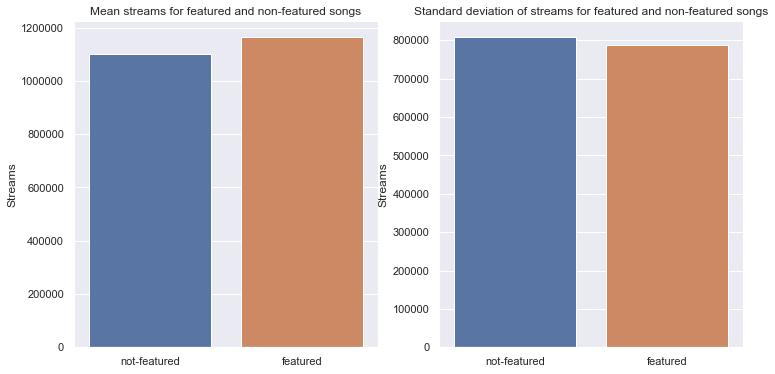

In [24]:
#charting featured vs non-featured
_, axes = plt.subplots(1, 2,figsize=(12,6))
_ = sns.barplot(is_featured_mean.index, is_featured_mean,ax=axes[0])
_ = _.set(label='# of streams', title='Mean streams for featured and non-featured songs')
_ = sns.barplot(is_featured_std.index, is_featured_std,ax=axes[1])
_ = _.set(label='# of streams', title='Standard deviation of streams for featured and non-featured songs')

In [53]:
#To determine if the means are significantly different, a bootstrap sampling of the means was performed

#loading the songs into numpy arrays
featured_songs = np.array(df['Streams'][df['is_featured']==1])
not_featured_songs = np.array(df['Streams'][df['is_featured']==0])

#calculate the difference in means
difference_in_mean = np.mean(featured_songs) - np.mean(not_featured_songs)

#compute mean stream of both samples
mean_streams = np.mean(np.append(featured_songs, not_featured_songs))
print (mean_streams)

#adjusting the two samples to have the same mean
featured_songs = featured_songs - np.mean(featured_songs) + mean_streams
not_featured_songs = not_featured_songs - np.mean(not_featured_songs) + mean_streams

print (np.mean(featured_songs))
print (np.mean(not_featured_songs))
print ('The difference between the sample means is %s' %difference_in_mean)

1113531.4904186025
1113531.4904186025
1113531.4904186025
The difference between the sample means is 65547.10255772131


In [50]:
#generate replicates for each sample
featured_replicates = np.array([np.random.choice(featured_songs, len(not_featured_songs), replace=True).mean() for x in range(10000)])
not_featured_replicates = np.array([np.random.choice(not_featured_songs, len(not_featured_songs), replace=True).mean() for x in range(10000)])

In [57]:
replicate_differences = featured_replicates - not_featured_replicates
pvalue = np.sum(replicate_differences >= difference_in_mean) / len(replicate_differences)
print (pvalue)

0.0


## With a pvalue of 0, we can reject the null hypothesis that the average stream numbers between songs that feature another artist are higher than those that are not featured.

## 2) What kind of growth in stream numbers has Spotify achieved over the past two years?

In [73]:
#confirming datatype
type(df.iloc[0]['Date'])

pandas._libs.tslibs.timestamps.Timestamp

In [87]:
#converting timestamp object to datetime
df['Date'] = pd.to_datetime(df['Date']).apply(lambda x: x.date())

In [89]:
#confirming
type(df.iloc[0]['Date'])

datetime.date

In [109]:
df2.index = pd.to_datetime(df2.index)

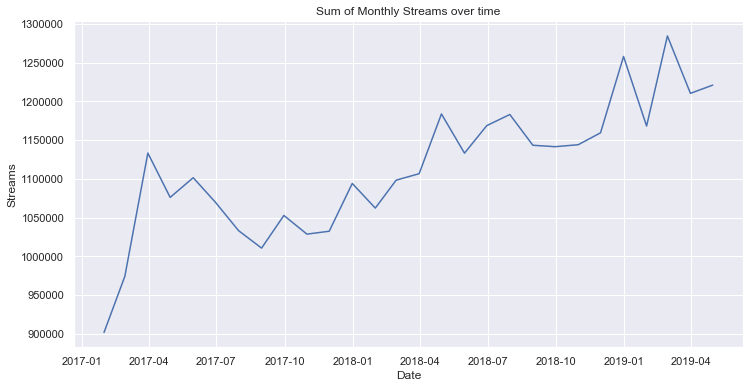

In [128]:
monthly_resample = df2['Streams'].resample('M').mean()
monthly_resample.head()
plt.figure(figsize = (12,6))
_ = sns.lineplot(monthly_resample.index, monthly_resample).set_title('Sum of Monthly Streams over time')

#### The above plot shows significant growth over time. 


However we can resample to a smaller timeframe to see if anything can be observed

## 3) When do Spotify users tend to stream the most (day of week, time of year, etc.)?

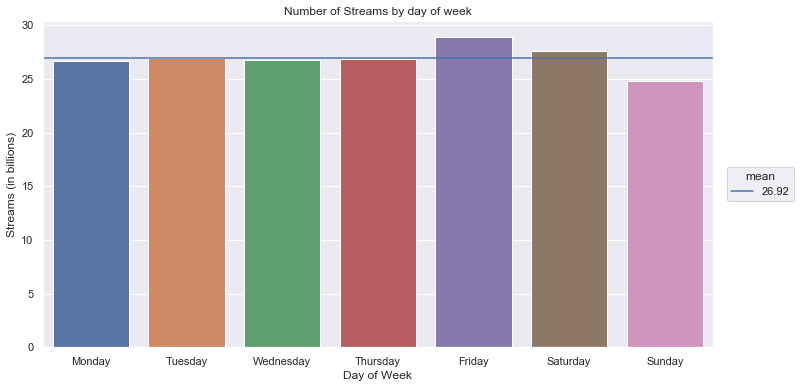

In [248]:
#resampling by day of week and plotting the results
weekly_resample = df2['Streams'].reset_index()
weekly_resample['day_of_week'] = weekly_resample['Date'].dt.dayofweek
weekly_resample = weekly_resample.groupby('day_of_week')['Streams'].sum().reset_index()
day_dict = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
weekly_resample['day_of_week'] = weekly_resample['day_of_week'].map(day_dict)
weekly_resample['Streams'] = weekly_resample['Streams'] / 1000000000

_ = plt.figure(figsize=(12,6))

_ = sns.barplot(weekly_resample['day_of_week'], weekly_resample['Streams'])
_ =_.set(title='Number of Streams by day of week', xlabel='Day of Week', ylabel='Streams (in billions)')
_ = plt.axhline(np.mean(weekly_resample['Streams']), 10,0,color='b',label=str(round(np.mean(weekly_resample['Streams']),2)))
_ = plt.legend(title='mean', loc='center right', bbox_to_anchor=(1.13, 0.5))


#### From the above graph, among the top 200 list of songs, we see that Friday and Saturday have the highest stream numbers with Sunday being the lowest.

In [278]:
monthly_resample = df2['Streams'].reset_index()
mask = (monthly_resample['Date'] >= '2017-01-01') & (monthly_resample['Date'] <= '2018-12-31')
monthly_resample = monthly_resample[mask]

In [279]:
#resampling by day of week and plotting the results
monthly_resample['month'] = monthly_resample['Date'].dt.month
monthly_resample['month'] = monthly_resample['Date'].dt.month
monthly_resample = monthly_resample.groupby('month')['Streams'].sum().reset_index()
monthly_resample['Streams'] = monthly_resample['Streams'] / 1000000000
month_dict = {1:'January', 2:'February', 3:'March', 4:'April',5:'May',6:'June', 7:'July', 8:'August', 9:'September', 10:'October',11:'November',12:'December'}
monthly_resample['month'] = monthly_resample['month'].map(month_dict)
monthly_resample.head()


,month,Streams
0,January,12.178362
1,February,11.412064
2,March,13.889653
3,April,13.560857
4,May,13.416111


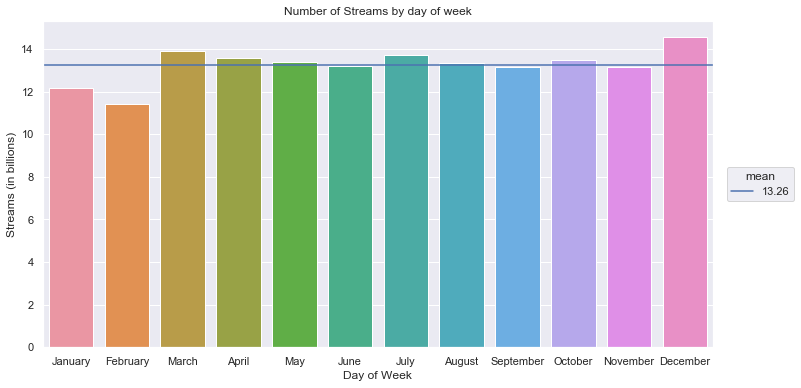

In [280]:
_ = plt.figure(figsize=(12,6))

_ = sns.barplot(monthly_resample['month'], monthly_resample['Streams'])
_ =_.set(title='Number of Streams by day of week', xlabel='Month', ylabel='Streams (in billions)')
_ = plt.axhline(np.mean(monthly_resample['Streams']), 10,0,color='b',label=str(round(np.mean(monthly_resample['Streams']),2)))
_ = plt.legend(title='mean', loc='center right', bbox_to_anchor=(1.13, 0.5))

#### Splitting the data into monthly streams, we see that December is significantly higher than other months. While February is the lowest month. Given that Spotify's user demographic is largely younger, one could postulate that the dip in February could be due to school or exams. Additional data is required to confirm this hypothesis

In [104]:
df2.head()

,Position,Track Name,Artist,Streams,URL,is_featured
Date,,,,,,
2017-01-01,1,Starboy,The Weeknd,3135625.0,https://open.spotify.com/track/5aAx2yezTd8zXrk...,False
2017-01-01,2,Closer,The Chainsmokers,3015525.0,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,False
2017-01-01,3,Let Me Love You,DJ Snake,2545384.0,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,False
2017-01-01,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604.0,https://open.spotify.com/track/5knuzwU65gJK7IF...,True
2017-01-01,5,One Dance,Drake,2259887.0,https://open.spotify.com/track/1xznGGDReH1oQq0...,False


In [1]:
top_artists = df.groupby('Artist')['Streams'].sum().reset_index()
top_artists = top_artists.sort_values('Streams', ascending=False)

NameError: name 'df' is not defined

In [ ]:
print (top_artists.head())

In [ ]:
top_song = df.groupby(['Track Name','Artist']).sum().sort_values('Streams', ascending=False)

In [ ]:
top_song.head()

In [ ]:
#df = df.set_index('Date')

In [ ]:
df.head()

In [ ]:
df.head()

In [ ]:
streams_over_time = df.groupby('Date').sum()
streams_over_time_month = streams_over_time.resample('m').sum()

In [ ]:
print (streams_over_time_month)

In [ ]:
pd.plotting.register_matplotlib_converters()
%matplotlib inline
_ = plt.figure(figsize=(15,8))
_ = plt.plot(df['Date'], df['Streams'])
plt.show()

In [ ]:
streams_over_time_month.index

In [ ]:
%matplotlib inline
fig = plt.figure()
fig.set_size_inches(15, 8, forward=True)
_ = plt.plot(streams_over_time_month.index, streams_over_time_month['Streams'])
_ = plt.xlabel('Date')
_ = plt.ylabel('# of Top 200 Streams')
plt.show()

In [ ]:
top_one = df[df['Position'] == '1']
top_one.head()

In [ ]:
from sklearn import linear_model

%matplotlib inline
fig = plt.figure()
fig.set_size_inches(15, 8, forward=True)
_ = plt.plot(top_one.Date, top_one['Streams'])
_ = plt.xlabel('Date')
_ = plt.ylabel('# of Top 200 Streams')

reg = linear_model.LinearRegression()
reg.fit(top_one['Streams'], top_one.Date)

plt.show()

In [ ]:
df